In [1]:
from csv_process import DataReader
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# leo1 test 5 invalid, jerry1 test 0 invalid, jerry0 test 7 invalid, fan1 test 3,4

names = ["fan", "jieying", "joe", "ycty", "yun","dd","leah","aleix", "tj", "leo"]
dates = ["feb-28", "mar-03", "mar-02", "mar-03", "mar-02", "mar-06", "mar-06", "mar-13", "mar-16", "mar-16"]
order = [0,        3,       2,      4,      1,   6,    5,      7,     8,     9]
invalids = [
    ([],[3,4]),
    ([],[1,5,6,7,8,9]),
    ([1,4],[1]),
    ([],[]),
    ([3,4,5,6,7,8],[0,1,2]),
    ([2,7],[7]),
    ([],[]),
    ([],[]),
    ([],[]),
    ([],[3])
]

# %matplotlib tk

In [3]:
def get_data():
    # get the tactile map at each palpation event

    palp_data0 = []
    palp_data1 = []

    for i, name in enumerate(names[:]):
        # continue
        participant = DataReader(name, dates[i])
        data = participant.readData(invalids[i])
        participant.get_skin_data(0)
        participant.get_skin_data(1)

        data= participant.get_palpation_tactile(0)
        palp_data0.append(data)
        data= participant.get_palpation_tactile(1)
        palp_data1.append(data)

    return palp_data0, palp_data1

palp_data0, palp_data1 = get_data()

event:  0
event:  1
event:  2
event:  5
event:  6
event:  7
event:  8
event:  9
event:  0
event:  1
event:  2
event:  3
event:  4
event:  5
event:  6
event:  7
event:  8
event:  9
event:  0
event:  2
event:  3
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
event:  4
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
event:  0
event:  1
event:  2
event:  3
event:  4
event:  5
event:  6
event:  7
event:  8
event:  9
event:  0
event:  2
event:  3
event:  4
event:  5
event:  6
event:  7
event:  8
event:  9
event:  0
event:  2
event:  3
event:  5
event:  6
event:  7
event:  8
event:  9
event:  0
event:  1
event:  2
event:  3
event:  4
event:  5
event:  6
event:  7
event:  8
event:  9
event:  0
event:  1
event:  2
event:  3
event:  4
event:  5
event:  6
event:  7
event:  8
event:  9
even

In [ ]:
def extend_matrix(matrix):
    extended = np.zeros((8,8))
    for i in range(64):
        print([i%8, i//8], [i%8, i//16])
        extended[i%8][i//8] = matrix[i%8//2][i//16]
    return extended

def fix_matrix(matrix):
    matrix[1][0] = np.average([matrix[0][0],matrix[1][1],matrix[2][0]])
    return matrix

def plot_palp_data(matrix):
    plt.matshow(matrix, cmap=plt.cm.Blues)
    plt.colorbar()
    plt.show()

for participant in range(1):
    for spot in range(1):
        for trial in palp_data0[participant][spot]:
            plot_palp_data(fix_matrix(trial))


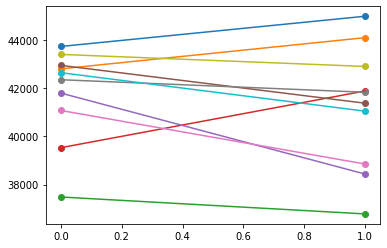

In [4]:
def matrix_pta(matrix, isMax = True):
    # the peak to average value on both ends
    matrix = np.array(matrix).flatten()
    if np.average(matrix) in [np.nan, np.inf, 0]:
        print(matrix)
        return np.nan
    if isMax:
        return max(matrix)/np.average(matrix)
    else:
        return min(matrix)/np.average(matrix), max(matrix)/np.average(matrix)


def matrix_std(matrix):
    # the std
    matrix = np.array(matrix).flatten()
    if np.average(matrix) in [np.nan, np.inf, 0]:
        print(matrix)
        return np.nan
    return np.std(matrix)

def matrix_ave(matrix):
    # the std
    matrix = np.array(matrix).flatten()
    if np.average(matrix) in [np.nan, np.inf, 0]:
        print(matrix)
        return np.nan
    return np.average(matrix)


def plot_pta(palp_data0, palp_data1):
    pta0 = []
    for participant in range(10):
        pta = []
        for point in range(3):
            for trial in palp_data0[participant][point]:
                pta += [matrix_ave(trial)]
        pta0.append(np.array(pta)[~np.isnan(pta)])
    pta0_ave = [np.average(row) for row in pta0]

    pta1 = []
    for participant in range(10):
        pta = []
        for point in range(3):
            for trial in palp_data1[participant][point]:
                pta += [matrix_ave(trial)]
        pta1.append(np.array(pta)[~np.isnan(pta)])
    pta1_ave = [np.average(row) for row in pta1]
    
    fig,ax = plt.subplots(1, 1)
    for i in range(10):
        ax.scatter([0,1],[pta0_ave[i],pta1_ave[i]])
        ax.plot([0,1],[pta0_ave[i],pta1_ave[i]])
    
    return pta0, pta1

pta0, pta1 = plot_pta(palp_data0, palp_data1)
                

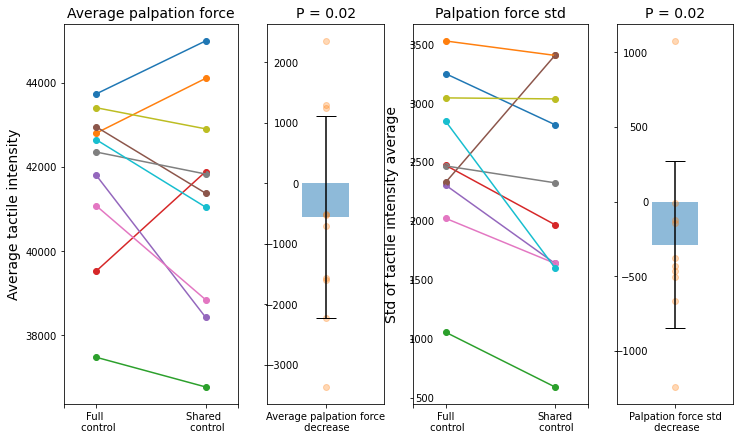

In [6]:
def plot_impulse(palp_data0, palp_data1):
    # used for when the return data is average over the palpation period
    pta0 = []
    for participant in range(10):
        pta = []
        for point in range(3):
            for trial in palp_data0[participant][point]:
                pta += [trial]
        pta0.append(np.array(pta)[~np.isnan(pta)])
    pta0_ave = [np.average(row) for row in pta0]
    pta0_std = [np.std(row) for row in pta0]

    pta1 = []
    for participant in range(10):
        pta = []
        for point in range(3):
            for trial in palp_data1[participant][point]:
                pta += [trial]
        pta1.append(np.array(pta)[~np.isnan(pta)])
    pta1_ave = [np.average(row) for row in pta1]
    pta1_std = [np.std(row) for row in pta1]

    fig,(ax1,ax11,ax2,ax22) = plt.subplots(1, 4, gridspec_kw={'width_ratios': [1.5, 1, 1.5, 1], 'height_ratios': [1]},figsize=(12,7))
    for i in range(10):
        ax1.scatter([0,1],[pta0_ave[i],pta1_ave[i]])
        ax1.plot([0,1],[pta0_ave[i],pta1_ave[i]])
    ax1.set_xticks([-0.3,0,1,1.3], ["","Full \n control", "Shared \n control",""], fontsize=14)
    ax1.tick_params(labelsize=10)
    # ax1.set_yticks([0.88, 0.9,0.92, 0.94, 0.96])
    # ax1.tick_params(axis='y', pad=-30)
    # ax1.set_ylim([0.879, 0.962])
    ax1.set_ylabel('Average tactile intensity', fontsize=14)
    ax1.set_title('Average palpation force',fontsize = 14.0)

    diff = np.array(pta1_ave) - np.array(pta0_ave)
    ax11.bar(0, np.mean(diff), yerr = np.std(diff), align='center', alpha=0.5, ecolor='black', capsize=10)
    ax11.scatter([0]*10, diff, alpha=0.3)
    # ax11.set_ylabel('Improvement of Silhouette mark by shared control')
    ax11.set_xlim([-1,1])
    ax11.tick_params(labelsize=10)
    ax11.tick_params(axis='y', pad=-35)
    # ax11.set_ylim([-0.2,1])
    ax11.set_xticks([0], ["Average palpation force\n decrease"], fontsize=10)
    ax11.set_title('P = 0.02',fontsize = 14.0)
    
    # orientation scatter plot
    for i in range(10):
        ax2.scatter([0,1],[pta0_std[i],pta1_std[i]])
        ax2.plot([0,1],[pta0_std[i],pta1_std[i]])
    ax2.set_xticks([-0.3,0,1,1.3], ["","Full\n control", "Shared\n control",""], fontsize=10)
    # ax2.set_yticks([-0.2,0,0.2,0.4,0.8,1])
    ax2.tick_params(axis='y', pad=-25)
    ax2.tick_params(labelsize=10)
    # ax2.set_ylim([-0.22, 1.02])
    ax2.set_ylabel('Std of tactile intensity average',labelpad=10,fontsize=14)
    ax2.set_title('Palpation force std',fontsize = 14.0)
    

    diff = np.array(pta1_std) - np.array(pta0_std)
    ax22.bar(0, np.mean(diff), yerr = np.std(diff), align='center', alpha=0.5, ecolor='black', capsize=10)
    ax22.scatter([0]*10, diff, alpha=0.3)
    # ax22.set_ylabel('Improvement of Silhouette mark by shared control')
    ax22.set_xlim([-1,1])
    ax22.tick_params(labelsize=10)
    # ax22.set_ylim([-0.05,0.95])
    ax22.tick_params(axis='y', pad=-35)
    ax22.set_xticks([0], ["Palpation force std\n decrease"])
    ax22.set_title('P = 0.02',fontsize = 14.0)

    return pta0, pta1

pta0, pta1 = plot_impulse(palp_data0, palp_data1)
    

force:  -557.5751342949858


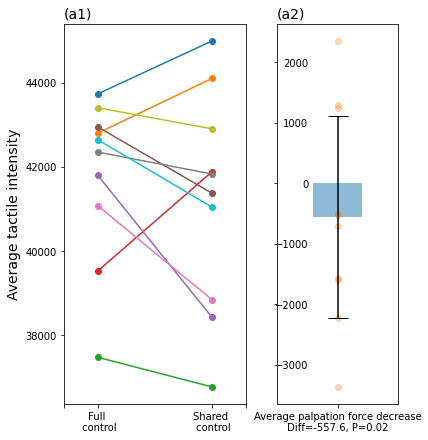

In [8]:
def plot_impulse(palp_data0, palp_data1):
    # used for when the return data is average over the palpation period
    pta0 = []
    for participant in range(10):
        pta = []
        for point in range(3):
            for trial in palp_data0[participant][point]:
                pta += [trial]
        pta0.append(np.array(pta)[~np.isnan(pta)])
    pta0_ave = [np.average(row) for row in pta0]
    pta0_std = [np.std(row) for row in pta0]

    pta1 = []
    for participant in range(10):
        pta = []
        for point in range(3):
            for trial in palp_data1[participant][point]:
                pta += [trial]
        pta1.append(np.array(pta)[~np.isnan(pta)])
    pta1_ave = [np.average(row) for row in pta1]
    pta1_std = [np.std(row) for row in pta1]

    fig,(ax1,ax11) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1.5, 1], 'height_ratios': [1]},figsize=(6,7))
    for i in range(10):
        ax1.scatter([0,1],[pta0_ave[i],pta1_ave[i]])
        ax1.plot([0,1],[pta0_ave[i],pta1_ave[i]])
    ax1.set_xticks([-0.3,0,1,1.3], ["","Full \n control", "Shared \n control",""], fontsize=14)
    ax1.tick_params(labelsize=10)
    # ax1.set_yticks([0.88, 0.9,0.92, 0.94, 0.96])
    # ax1.tick_params(axis='y', pad=-30)
    # ax1.set_ylim([0.879, 0.962])
    ax1.set_ylabel('Average tactile intensity', fontsize=14)
    # ax1.set_title('Average palpation force',fontsize = 14.0)
    ax1.set_title('(a1)',fontsize = 14.0, loc='left')

    diff = np.array(pta1_ave) - np.array(pta0_ave)
    print("force: ", np.average(diff))
    ax11.bar(0, np.mean(diff), yerr = np.std(diff), align='center', alpha=0.5, ecolor='black', capsize=10)
    ax11.scatter([0]*10, diff, alpha=0.3)
    # ax11.set_ylabel('Improvement of Silhouette mark by shared control')
    ax11.set_xlim([-1,1])
    ax11.tick_params(labelsize=10)
    ax11.tick_params(axis='y', pad=-35)
    # ax11.set_ylim([-0.2,1])
    ax11.set_xticks([0], ["Average palpation force decrease\nDiff=-557.6, P=0.02"], fontsize=10)
    # ax11.set_title('P = 0.02',fontsize = 14.0)
    ax11.set_title('(a2)',fontsize = 14.0, loc='left')
    
    return pta0, pta1

pta0, pta1 = plot_impulse(palp_data0, palp_data1)
    

In [ ]:
def p_caulculate(pta0, pta1):
    p0 = []
    p1 = []
    for p in range(10):
        n = min(len(pta0[p]), len(pta1[p]))
        p0 += [i for i in pta0[p][:n]]
        p1 += [i for i in pta1[p][:n]]
    print(stats.ttest_rel(p0, p1).pvalue)

p_caulculate(pta0, pta1)

In [ ]:
def p_caulculate(pta0, pta1):
    p0 = []
    p1 = []
    for p in range(10):
        n = min(len(pta0[p]), len(pta1[p]))
        p0 += [i for i in pta0[p][:n]]
        p1 += [i for i in pta1[p][:n]]
    print(stats.ttest_rel(p0, p1).pvalue)

p_caulculate(pta0, pta1)